### mandelbrot set
the mandelbrot set is generated by calculating the following series of calculations on a grid of numbers (x,y)

\begin{align}
z_0 &= 0\\
z_1 &= z_0^2 + c = c\\
z_2 &= z_1^2 + c\\
...\\
z_{n+1} &= z_n^2 + c
\end{align}

and keeping track how many iterations are needed untill these numbers diverge (if at all) to infinity.<br>
The number surely diverges if the modulus abs($z_i$) is greater than 2 or the square of $z_i$ is greater than 4 respectively.

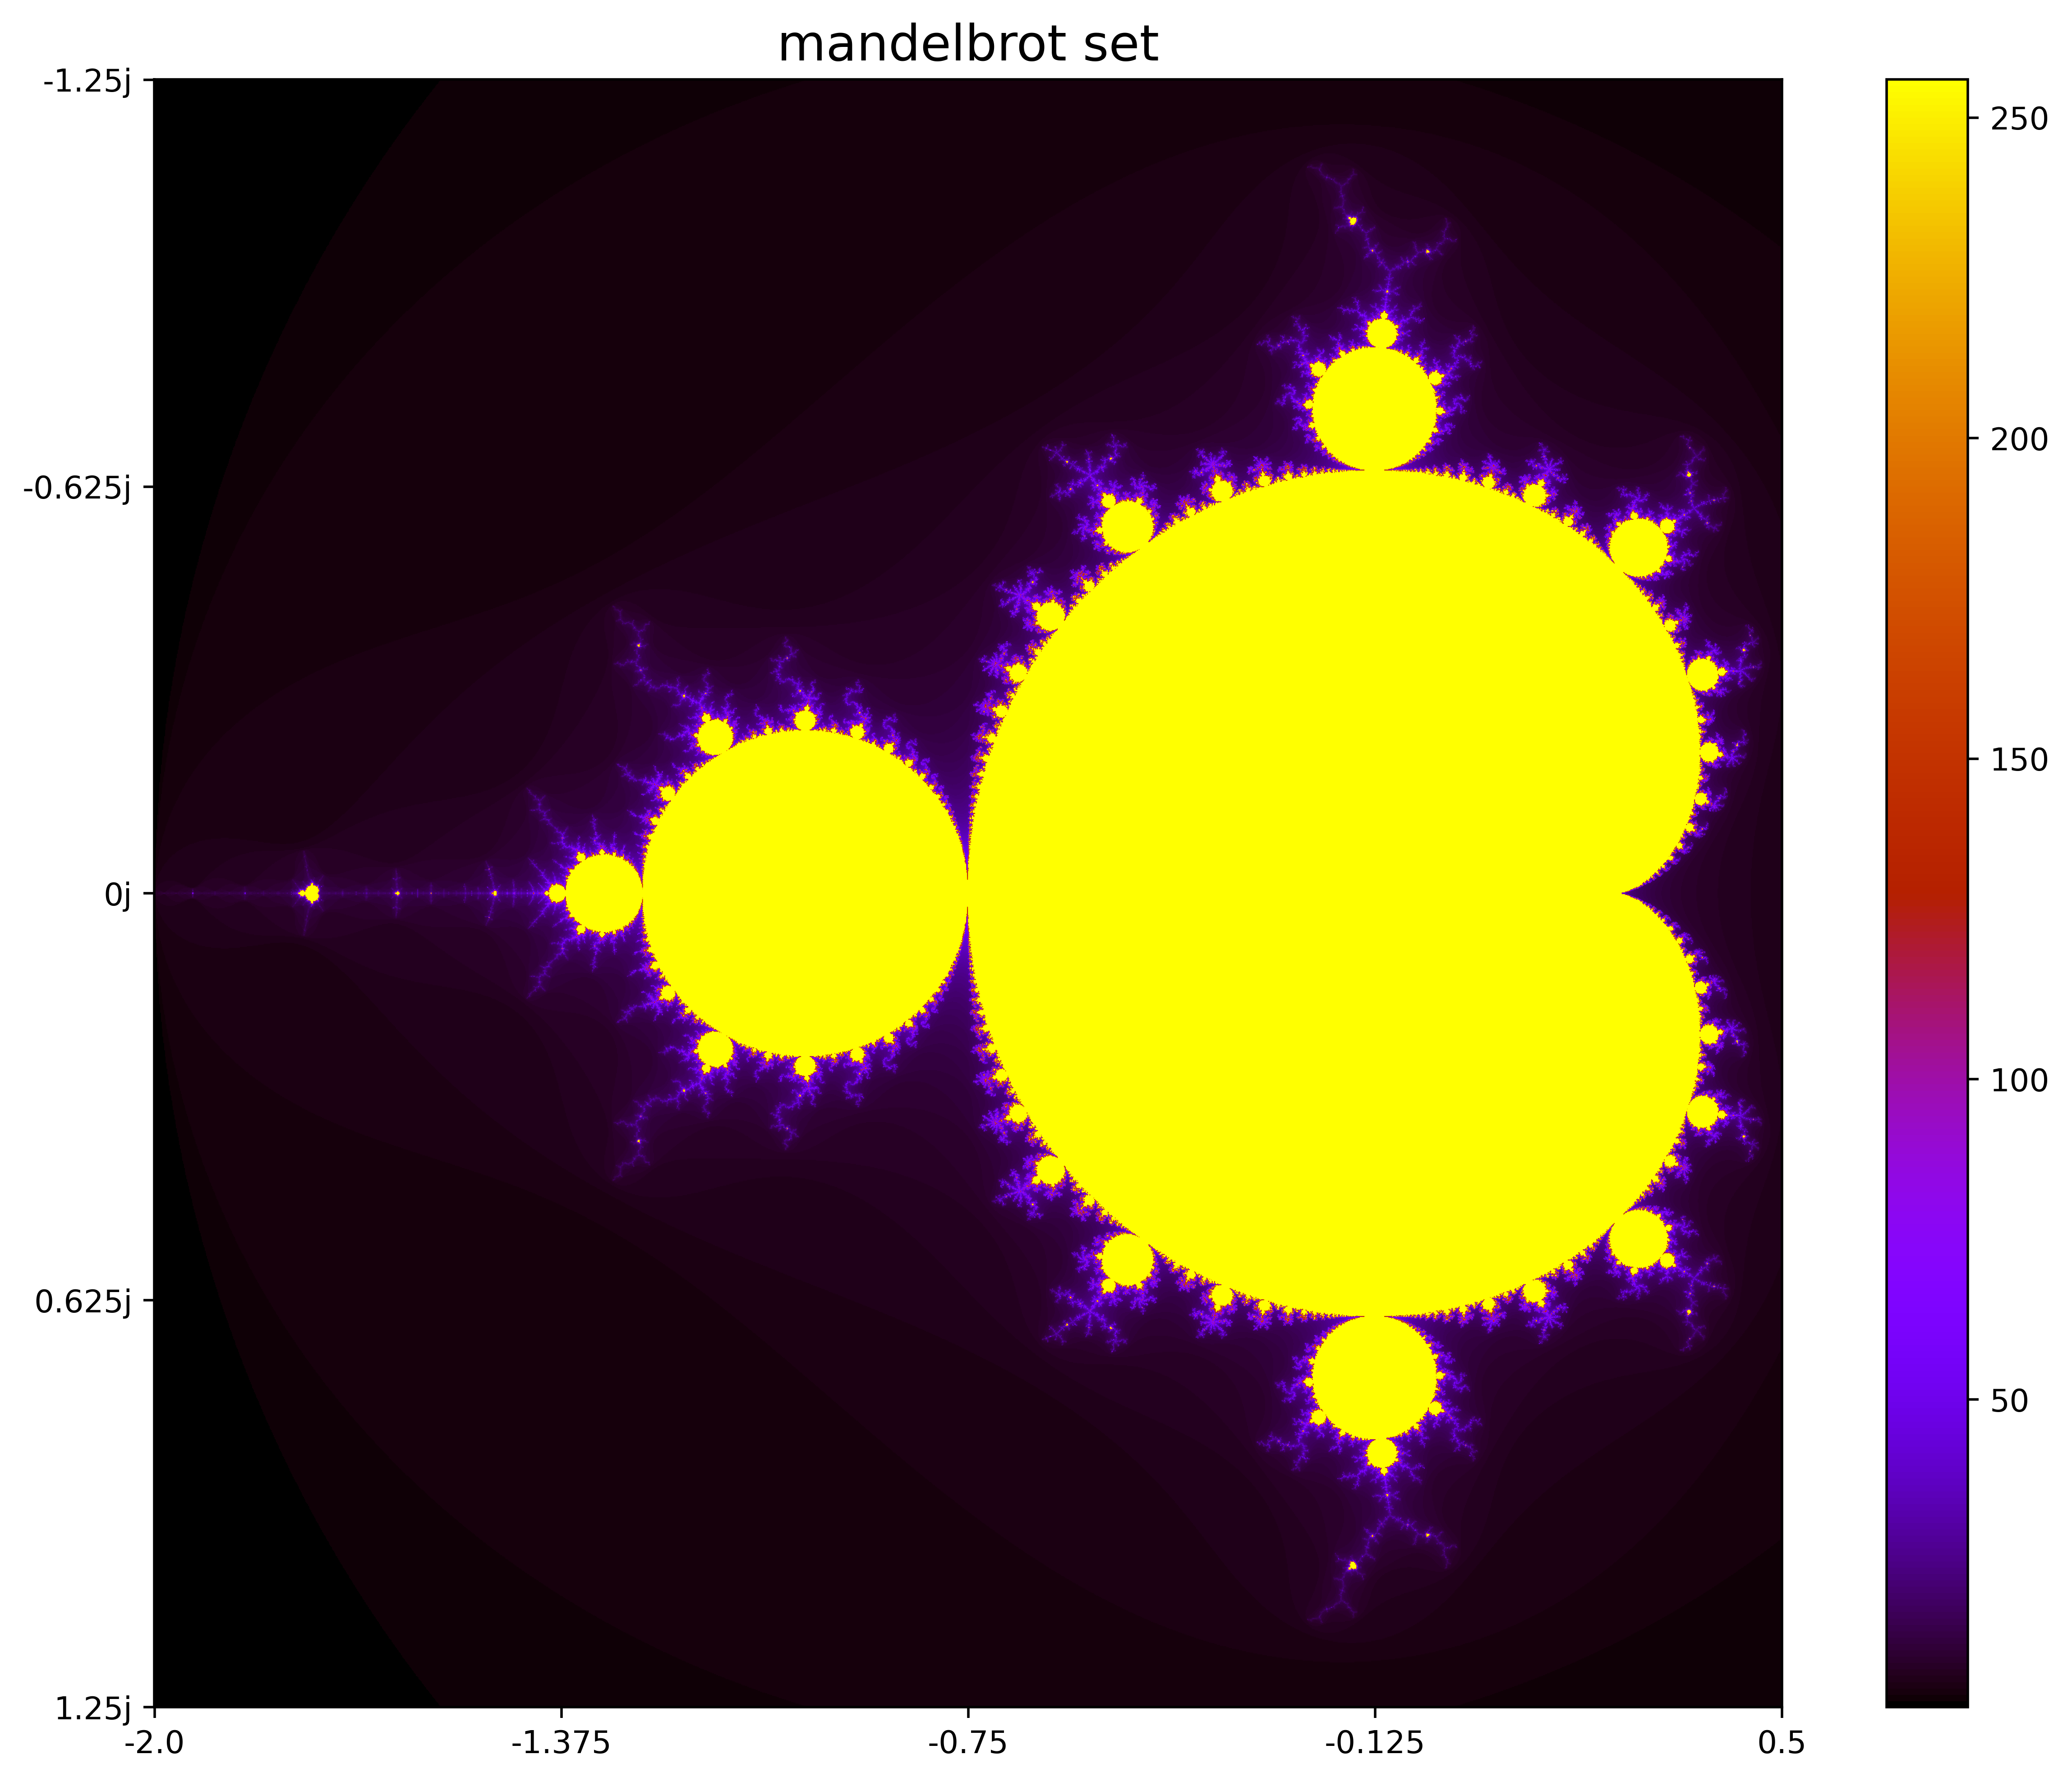

In [4]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

i = np.complex(0,1)
pi = np.pi

##########calculate##########

def mandelbrot(c,a_empty,maxiter):
    
    z=c
    
    pos=1
    while pos<maxiter:
        pos+=1
        z_squared = z.real*z.real +i*2*z.real*z.imag - z.imag*z.imag
        z_length = z.real*z.real + z.imag*z.imag
        z = z_squared + c
        
        #store iteration position of z greater 2
        mask = np.greater(z_length, 4.0)
        a_empty += mask*pos
        #kill z values greater 2
        z[mask==1] = np.complex(1,1)*np.nan
    
    #fill all zeros with last iteration position
    a_empty += pos*np.less_equal(z_length, 4.0)
    
    return a_empty

def grid(xmin,xmax,ymin,ymax,width,height):
    
    rx = np.linspace(xmin, xmax, width)
    ry = np.linspace(ymin, ymax, height)
    xx,yy = np.meshgrid(rx,ry)
    c = xx+yy
    a_empty = np.zeros((width,height),dtype=float)
    
    return c,a_empty

#setup
xmin=-2
xmax=0.5
ymin=-1.25*i
ymax=1.25*i
width=2**11
height=2**11
maxiter=2**8

c,a_empty = grid(xmin,xmax,ymin,ymax,width,height)
solution = mandelbrot(c,a_empty,maxiter)


fig = plt.figure(figsize=(10,8), dpi=500, facecolor='w', edgecolor='k')

ax = plt.subplot(111)
plt.title('mandelbrot set', fontsize=16)
plt.imshow(solution,cmap='gnuplot')
plt.colorbar()

ax.set_xticks(np.linspace(0,width,5))
ax.set_xticklabels(np.round(np.linspace(xmin,xmax,5),3))
ax.set_yticks(np.linspace(0,height,5))
ax.set_yticklabels(np.round(np.linspace(ymin,ymax,5),3))

plt.tight_layout()
plt.show()
#save_image(fig)

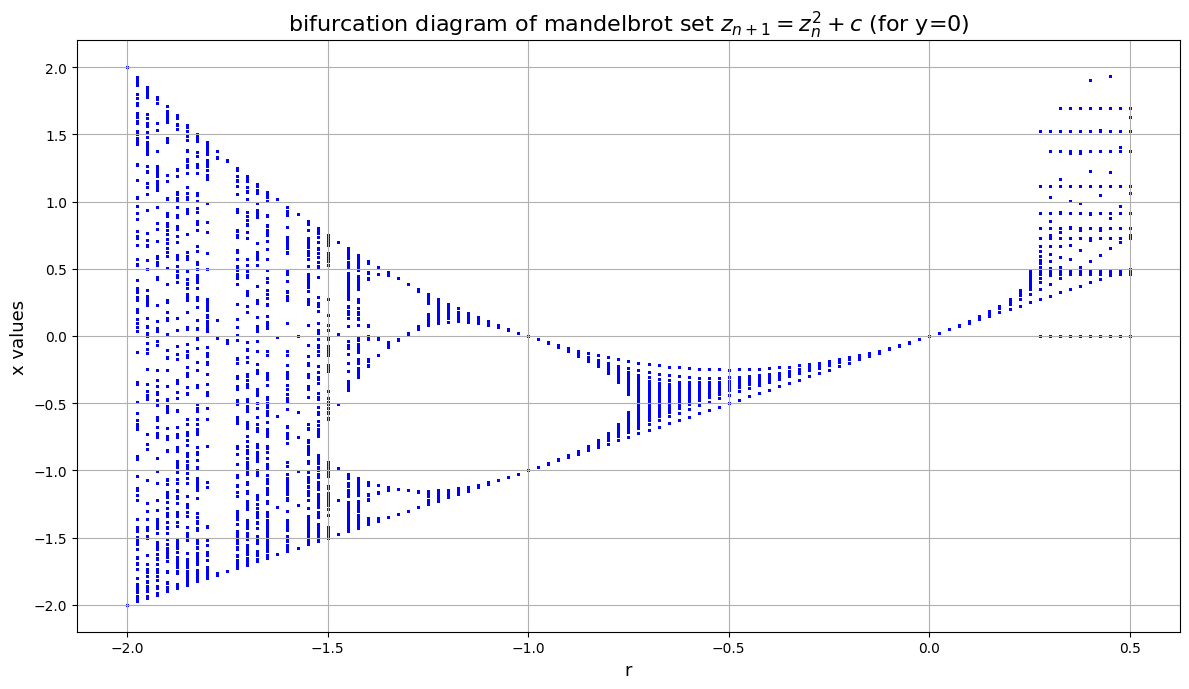

In [1]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

global i,pi
i = np.complex(0,1)
pi = np.pi

##########calculate##########

N=100
num_x=51

fx = lambda x,r: r*(x - np.multiply(x,x))
x = np.zeros(N,dtype=float)

fig = plt.figure(num=None, figsize=(12,7), dpi=100, facecolor='w', edgecolor='k')
ax1=plt.subplot(111)

for c in iter(np.linspace(-2,0.5,101)):
    x[0]=c
    
    #iterate
    for ii in range(0,N-1):
        x[ii+1]=x[ii]*x[ii]+c
        if  x[ii+1]>2:
            x[ii+1]=0
            break
    
    xx = np.unique(x)
    
    for iii in range(0,num_x):
        plt.scatter(c*np.ones(xx.size),xx, s=1, color='blue')

plt.title(r'bifurcation diagram of mandelbrot set $z_{n+1} = z_n^2 + c$ (for y=0)', fontsize=16)
plt.xlabel('r', fontsize=13)
plt.ylabel('x values', fontsize=13)
plt.grid(True)

#fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()